<a href="https://colab.research.google.com/github/nhtusci/Creditcard-Customer-Churn-Sklearn/blob/main/CreditCard_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns  #Python library for Vidualization
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

In [58]:
#total rows and colums in the dataset
df.shape

(200, 5)

In [59]:
df.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
#Missing values computation
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [82]:
# Chọn các cột để phân cụm
X = df.iloc[:, [3, 4]].values  # Điều chỉnh chỉ số cột theo dữ liệu của bạn

In [83]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

training model

In [84]:
# Phương pháp Elbow để xác định số cụm tối ưu
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

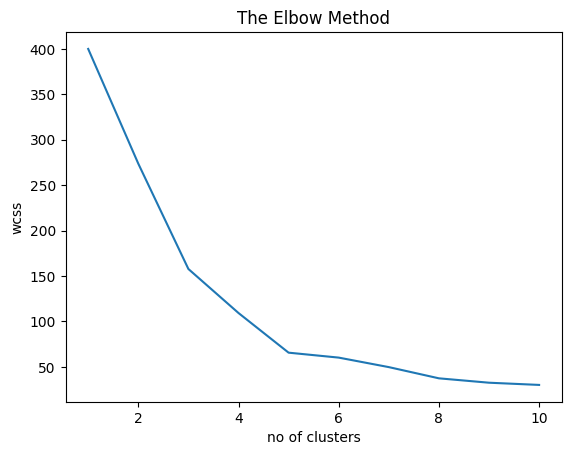

In [85]:
#Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [86]:
# Số cụm tối ưu
optimal_k = 5

# Thực hiện phân cụm K-means với số cụm tối ưu
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)


In [87]:
# Thêm nhãn cụm vào DataFrame
df['Cluster'] = clusters

# Tính toán thống kê mô tả cho từng cụm
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max']
})

In [88]:
# Hiển thị bảng thống kê
print(cluster_summary)

        Annual Income (k$)                     Spending Score (1-100)  \
                      mean        std min  max                   mean   
Cluster                                                                 
0                55.296296   8.988109  39   76              49.518519   
1                86.538462  16.312485  69  137              82.128205   
2                25.727273   7.566731  15   39              79.363636   
3                88.200000  16.399067  70  137              17.114286   
4                26.304348   7.893811  15   39              20.913043   

                            
               std min max  
Cluster                     
0         6.530909  34  61  
1         9.364489  63  97  
2        10.504174  61  99  
3         9.952154   1  39  
4        13.017167   3  40  


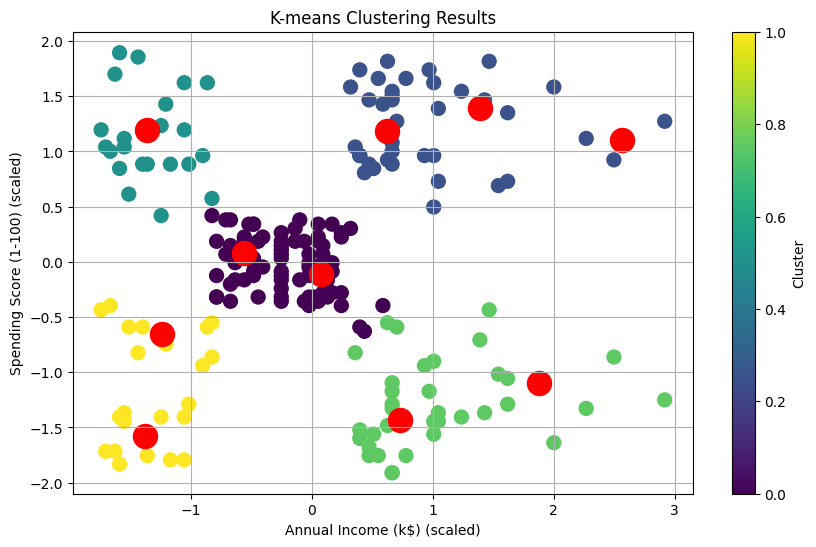

In [94]:
#Visualizing all the clusters

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.xlabel('Annual Income (k$) (scaled)')
plt.ylabel('Spending Score (1-100) (scaled)')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [91]:
# Nhóm khách hàng theo cụm
cluster_groups = df.groupby('Cluster')

# In ra danh sách khách hàng trong từng cụm
for cluster_number, group in cluster_groups:
    print(f"\nDanh sách khách hàng trong cụm {cluster_number}:")
    print(group[['CustomerID','Age', 'Annual Income (k$)', 'Spending Score (1-100)']])  # Thay đổi các cột theo nhu cầu



Danh sách khách hàng trong cụm 0:
     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
43           44   31                  39                      61
46           47   50                  40                      55
47           48   27                  40                      47
48           49   29                  40                      42
49           50   31                  40                      42
..          ...  ...                 ...                     ...
121         122   38                  67                      40
122         123   40                  69                      58
126         127   43                  71                      35
132         133   25                  72                      34
142         143   28                  76                      40

[81 rows x 4 columns]

Danh sách khách hàng trong cụm 1:
     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
123         124   39                  69                      